### Eigenvalue & Eigenvector with numpy

In [2]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt

testmatrix = np.array([[2,1],
                        [1,2]])

#Eigenvalue와 Eigenvector
print (lin.eig(testmatrix)) 

#Eigenvalue
print (lin.eig(testmatrix)[0])  
#Eigenvector
print (lin.eig(testmatrix)[1]) 

(array([3., 1.]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))
[3. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [3]:
mat = lin.eig(testmatrix)[1]
print(mat[:,0])
print(mat[:,1])

[0.70710678 0.70710678]
[-0.70710678  0.70710678]


In [4]:
# k0'*k0 = 1 : 단위 벡터
mat[:,0].T.dot(mat[:,0])

0.9999999999999998

### PCA 간단예제

In [3]:
import pandas as pd
np.random.seed(0)

In [4]:
# 랜덤값 생성
x = np.random.randn(100)
x2 = 0.5*x + np.random.randn(100)*0.3
# print(x)
# print(y)
X = pd.DataFrame({'x1':x,'x2':x2})

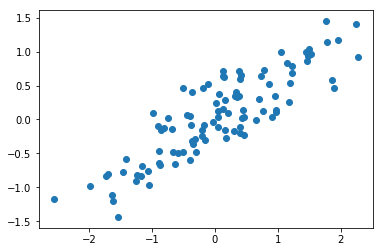

In [7]:
plt.scatter(X['x1'],X['x2'])

In [23]:
# 공분산행렬
mat = X.cov()
kk = np.cov(X)
mat.shape

(2, 2)

In [27]:
a = [1,2,3,4]
pd.DataFrame(a)

,0
0,1
1,2
2,3
3,4


### 공분산행렬 변환

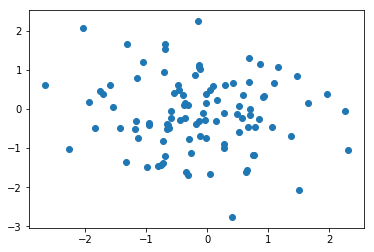

In [9]:
# 2차원 공간벡터
data = np.random.randn(200).reshape(100,2)
plt.scatter(data[:,0],data[:,1])

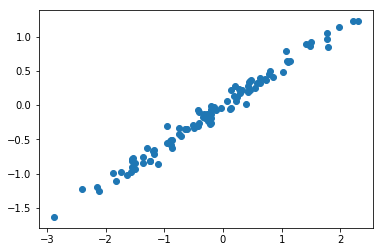

In [10]:
data2 = data.dot(mat)
plt.scatter(data2[:,0],data2[:,1])

### 공분산행렬 스펙트럼 분해

In [11]:
lin.eig(mat)

(array([1.34174117, 0.07349682]), array([[ 0.86666587, -0.49888903],
        [ 0.49888903,  0.86666587]]))

In [12]:
k1 = lin.eig(mat)[1][:,0]

In [13]:
k2 = lin.eig(mat)[1][:,1]

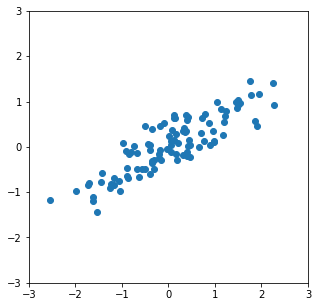

In [14]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 
plt.scatter(X['x1'],X['x2']);

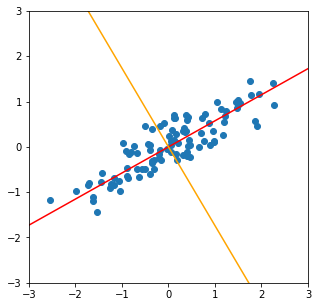

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 
plt.scatter(X['x1'],X['x2'])

# 고유벡터 시각화
plt.plot([-4*k1[0],4*k1[0]],[-4*k1[1],4*k1[1]],c='red')
plt.plot([-4*k2[0],4*k2[0]],[-4*k2[1],4*k2[1]],c='orange')

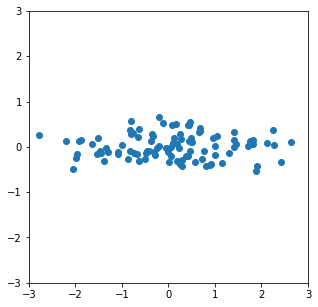

In [16]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 

# 회전된 결과
PC1 = k1.dot(X.T)
# PC1 = k1[0]*X['x1'] + k1[1]*X['x2']
PC2 = k2.dot(X.T)
# PC2 = k2[0]*X['x1'] + k2[1]*X['x2']

plt.scatter(PC1,PC2);

### sklearn PCA

In [5]:
from sklearn.decomposition import PCA

# 2개로 축소 
model = PCA(n_components=2)

# fit : component 생성
# transform : 변환후 반환
# fit_transform : fit과 transform 동시 적용

pca_features = model.fit_transform(X)

In [19]:
pca_components = model.fit(X)
pca_components

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
PC1.shape

(100,)

array([-2.17169516, -0.16587799, -0.82320336, -2.56714364, -1.82979639,
        0.87888156, -0.9194716 ,  0.35982741, -0.09356982, -0.60083007,
       -0.36125297, -1.67970753, -0.64147834, -0.34264893, -0.37626222,
       -0.41349143, -1.7303023 ,  0.33120608, -0.36229839,  0.89426845,
        2.87210704, -0.48593985, -0.93041559,  0.70884923, -2.35031607,
        1.72465491,  0.0930834 ,  0.01117158, -1.73234399, -1.6219231 ,
        0.02131933, -0.42375181,  1.17081901,  2.2850505 ,  0.56250031,
       -0.1967153 , -1.3804097 , -1.23178629,  0.45205742,  0.58002512,
        1.47251943,  1.59816142,  1.95846737, -2.19329679,  0.29117761,
        0.4266091 ,  1.61390397, -0.95591826,  2.07726264,  0.38555244,
        1.08867999, -0.60922931,  0.76060688,  1.52043314,  0.1252165 ,
       -0.29973808, -0.1638335 , -0.09693527,  0.9587383 ,  0.54941323,
        0.90410593,  0.19154126,  0.84449128,  1.9926454 ,  0.0644067 ,
        0.40108581,  2.04820721, -0.20628832,  0.91386358, -0.02

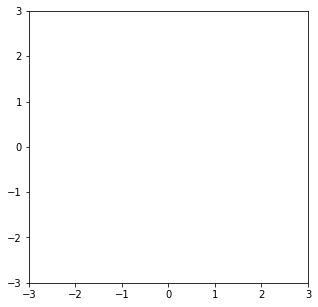

In [6]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 

PC1 = pca_features[:,0]
PC2 = pca_features[:,1]
PC1
# plt.scatter(PC1,PC2)

# plt.plot([0,0],[-3,3],c='orange');
# plt.plot([-3,3],[0,0],c='red');

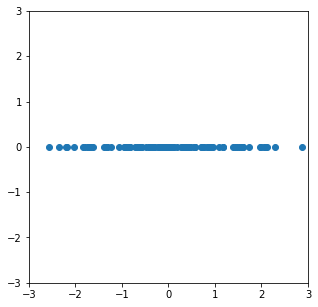

In [19]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 

# 1개의 주성분만 표현
plt.scatter(PC1,len(PC1)*[0]);

# IRIS DATA

In [29]:
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
# 데이터 로드
iris = datasets.load_iris()

In [35]:
labels = np.array(iris.target).reshape(150,)
data = pd.DataFrame(iris.data,columns=['Sepal length','Sepal width','Petal length','Petal width'])

### PCA

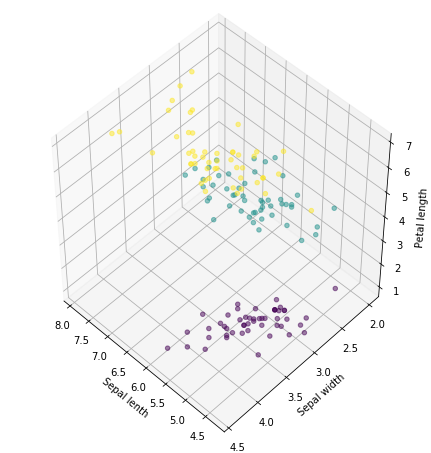

In [23]:
# 3차원
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(data['Sepal length'],data['Sepal width'],data['Petal length'],c=labels,alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

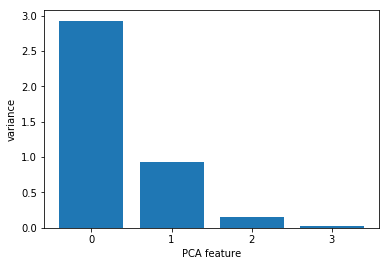

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# 정규화
scaler = StandardScaler()

# pca , 디폴트 components는 n(전체 feature 수)
pca = PCA()

# pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(data)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

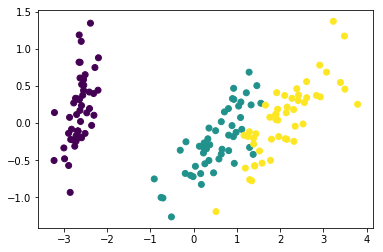

In [25]:
# 2차원
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=2)
pca_features = model.fit_transform(data)

xf = pca_features[:,0]
yf = pca_features[:,1]
plt.scatter(xf,yf,c=labels);
plt.show();

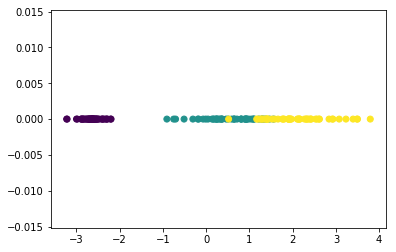

In [26]:
# 1차원
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=1)
pca_features = model.fit_transform(data)

xf = pca_features[:,0]
yf = len(xf)*[0]
plt.scatter(xf,yf,c=labels);
plt.show();

### TSNE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


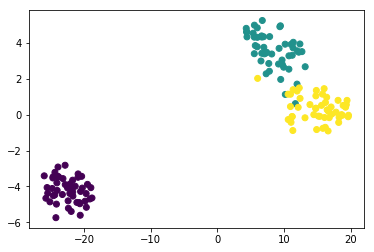

In [27]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(data)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=labels)

plt.show()

# MNIST DATA

In [28]:
# 데이터 로드
import numpy as np
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")

X = mnist.data / 255.0
y = mnist.target

#print (X.shape, y.shape)
y.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


TimeoutError: [WinError 10060] 연결된 구성원으로부터 응답이 없어 연결하지 못했거나, 호스트로부터 응답이 없어 연결이 끊어졌습니다

In [58]:
import pandas as pd

feat_cols = ['pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

print( 'Size of the dataframe: {}'.format(df.shape) )

Size of the dataframe: (70000, 785)


<Figure size 432x288 with 0 Axes>

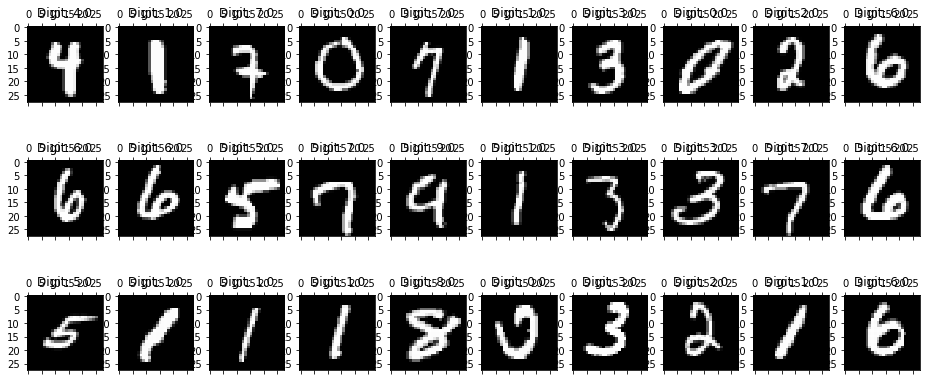

In [59]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax  = fig.add_subplot(3,10,i+1,title='Digit: ' + str(df.loc[rndperm[i], 'label']) )
    ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape((28,28)).astype(float))

plt.show()

### PCA

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]

print( 'Explained variation per principle component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principle component: [0.09746116 0.07155445 0.06149531]


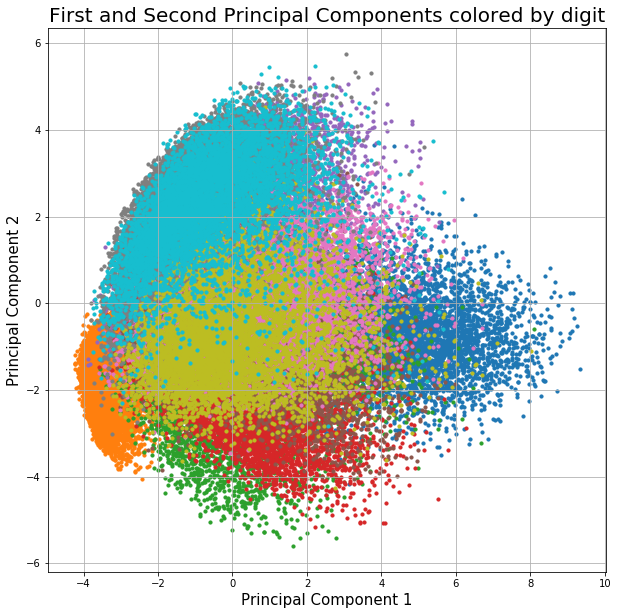

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title("First and Second Principal Components colored by digit", fontsize = 20)

xf = df['pca-one']
yf = df['pca-two']
for i in range(10):
    ax.scatter(xf[y==i],yf[y==i],s=10)
ax.grid()

In [63]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)
print( 'Cumulative explained variation for 50 principal components:',np.sum(pca_50.explained_variance_ratio_))

Cumulative explained variation for 50 principal components: 0.8253865673391005


### TSNE

In [80]:
import time
from sklearn.manifold import TSNE

# 사용할 데이터,, 너무 오래걸려서 조금만
n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, , perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

print( 't-SNE done! Time elapsed: {} seconds',time.time() - time_start )

In [77]:
df_tsne = df.loc[rndperm[:n_sne],:].copy() 
df_tsne['x-tsne'] = tsne_results[:,0] 
df_tsne['y-tsne'] = tsne_results[:,1] 

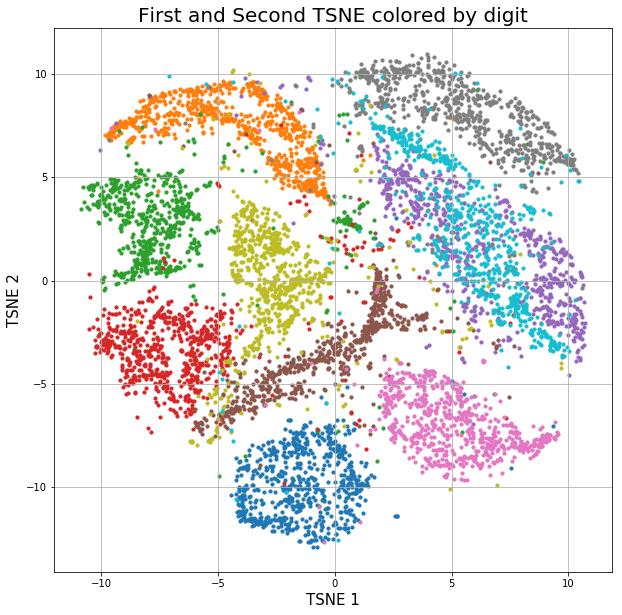

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('TSNE 1', fontsize = 15)
ax.set_ylabel('TSNE 2', fontsize = 15)
ax.set_title("First and Second TSNE colored by digit", fontsize = 20)

xf = df_tsne['x-tsne']
yf = df_tsne['y-tsne']
for i in range(10):
    ax.scatter(xf[y[rndperm[:n_sne]]==i],yf[y[rndperm[:n_sne]]==i],s=10)
ax.grid()


## Train & Test data

In [ ]:
pca_a = PCA()

pca_a.fit(X_train)
X_train_pca = pca.transform(X_train)

X_test_pca = pca.transform(X_test)